In [12]:
import pandas as pd
from pathlib import Path

In [2]:
DATA = Path.cwd().parent / 'data'


lj_speech_data_dir = DATA / 'raw' / 'LJSpeech-1.1'
! ls $lj_speech_data_dir

README       metadata.csv wavs


In [13]:
lj_metadata_df = pd.read_csv(str(lj_speech_data_dir / 'metadata.csv'), sep="|", header=None, names=['filepath', 'transcript', 'norm_transcript'])
lj_metadata_df.head(2)

,filepath,transcript,norm_transcript
0,LJ001-0001,"Printing, in the only sense with which we are ...","Printing, in the only sense with which we are ..."
1,LJ001-0002,in being comparatively modern.,in being comparatively modern.


In [10]:
lj_metadata_records = lj_metadata_df.to_dict(orient='records')

In [26]:
for record in lj_metadata_records:
    if record['filepath'] == "LJ004-0076":
        print(record)

{'filepath': 'LJ004-0076', 'transcript': 'Disease, cold, famine, nakedness, and contagious and polluted air are not lawful punishments in the hands of the civil magistrates;|Disease, cold, famine, nakedness, and contagious and polluted air are not lawful punishments in the hands of the civil magistrates;', 'norm_transcript': nan}


In [27]:
out_dir = Path.cwd().parent.parent / 'aligner' / 'data' / 'in_corpus'

for record in lj_metadata_records:
    audio_fname = f"{record['filepath']}.wav"
    transcript_fname = f"{record['filepath']}.txt"
    audio_filepath = lj_speech_data_dir / 'wavs' / audio_fname

    if audio_filepath.exists():
        transcript = record['norm_transcript']
        
        # Create the transcription and copy audio file
        with open(str(out_dir / transcript_fname), 'a') as f:
            try:
                f.write(transcript)
                _ = shutil.copy(audio_filepath, out_dir)
            except Exception as e:
                print(f"Error: {e}")
                print(f"File: {audio_fname}")
                print(f"Transcript: {transcript}")

Error: write() argument must be str, not float
File: LJ004-0076.wav
Transcript: nan
Error: write() argument must be str, not float
File: LJ004-0079.wav
Transcript: nan
Error: write() argument must be str, not float
File: LJ004-0250.wav
Transcript: nan
Error: write() argument must be str, not float
File: LJ005-0028.wav
Transcript: nan
Error: write() argument must be str, not float
File: LJ005-0030.wav
Transcript: nan
Error: write() argument must be str, not float
File: LJ005-0077.wav
Transcript: nan
Error: write() argument must be str, not float
File: LJ005-0253.wav
Transcript: nan
Error: write() argument must be str, not float
File: LJ005-0282.wav
Transcript: nan
Error: write() argument must be str, not float
File: LJ006-0083.wav
Transcript: nan
Error: write() argument must be str, not float
File: LJ006-0238.wav
Transcript: nan
Error: write() argument must be str, not float
File: LJ007-0128.wav
Transcript: nan
Error: write() argument must be str, not float
File: LJ007-0143.wav
Transcri

In [ ]:
"""
acoustic_model_dictionary_path: "~/Documents/MFA/pretrained_models/dictionary/english_us_arpa.dict"
acoustic_model_path: "~/Documents/MFA/pretrained_models/acoustic/english_us_arpa.zip"
"""



# NeMo Aligner

In [1]:
import IPython.display as ipd

In [2]:
# Start with some imports so we can visualize alignments and load the checkpoint
%matplotlib inline
import matplotlib.pyplot as plt
import IPython.display as ipd

import librosa
import soundfile as sf
import torch

from nemo.collections.tts.models import AlignerModel

[NeMo W 2025-04-01 21:26:53 nemo_logging:361] /Users/mayankanand/Documents/audio/.env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
      from .autonotebook import tqdm as notebook_tqdm
    


In [3]:
# Set device (GPU or CPU)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Load the ARPABET Aligner model checkpoint
aligner = AlignerModel.from_pretrained("tts_en_radtts_aligner")

# This should be set to whatever sample rate your model was trained on
target_sr = 22050

[NeMo I 2025-04-01 21:27:00 cloud:58] Found existing object /Users/mayankanand/.cache/torch/NeMo/NeMo_2.1.0/Aligner/5b0d70eb6a09c1a8470b745034a1a00b/Aligner.nemo.
[NeMo I 2025-04-01 21:27:00 cloud:64] Re-using file from: /Users/mayankanand/.cache/torch/NeMo/NeMo_2.1.0/Aligner/5b0d70eb6a09c1a8470b745034a1a00b/Aligner.nemo
[NeMo I 2025-04-01 21:27:00 common:826] Instantiating model from pre-trained checkpoint


[NeMo E 2025-04-01 21:27:00 base:45] `nemo_text_processing` not installed, see https://github.com/NVIDIA/NeMo-text-processing for more details.
[NeMo E 2025-04-01 21:27:00 base:48] The normalizer will be disabled.
[NeMo W 2025-04-01 21:27:01 en_us_arpabet:66] apply_to_oov_word=None, This means that some of words will remain unchanged if they are not handled by any of the rules in self.parse_one_word(). This may be intended if phonemes and chars are both valid inputs, otherwise, you may see unexpected deletions in your input.
[NeMo W 2025-04-01 21:27:01 modelPT:176] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    dataset:
      _target_: nemo.collections.tts.torch.data.TTSDataset
      manifest_filepath: /data3/LJSpeech/nvidia_ljspeech_train.json
      sample_rate: 22050
      sup_data_path: /data3/LJSpeech/align_supplementary/
      sup_data_t

[NeMo I 2025-04-01 21:27:01 features:305] PADDING: 1
[NeMo I 2025-04-01 21:27:01 save_restore_connector:275] Model AlignerModel was successfully restored from /Users/mayankanand/.cache/torch/NeMo/NeMo_2.1.0/Aligner/5b0d70eb6a09c1a8470b745034a1a00b/Aligner.nemo.


In [32]:
!wget https://multilangaudiosamples.s3.us-east-2.amazonaws.com/LJ023-0089.wav

--2025-03-28 01:35:52--  https://multilangaudiosamples.s3.us-east-2.amazonaws.com/LJ023-0089.wav
Resolving multilangaudiosamples.s3.us-east-2.amazonaws.com (multilangaudiosamples.s3.us-east-2.amazonaws.com)... 52.219.98.194, 3.5.132.248, 3.5.132.90, ...
Connecting to multilangaudiosamples.s3.us-east-2.amazonaws.com (multilangaudiosamples.s3.us-east-2.amazonaws.com)|52.219.98.194|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 115558 (113K) [audio/wav]
Saving to: ‘LJ023-0089.wav’

LJ023-0089.wav      100%[===================>] 112.85K  54.0KB/s    in 2.1s    

2025-03-28 01:35:55 (54.0 KB/s) - ‘LJ023-0089.wav’ saved [115558/115558]



In [4]:
# This tutorial uses a sample from the NVIDIA test split of LJSpeech.
audio_path = "./LJ023-0089.wav"
text_raw = "That is not only my accusation."

# Load audio and resample if necessary
audio_data, orig_sr = sf.read(audio_path)
if orig_sr != target_sr:
    audio_data = librosa.core.resample(audio_data, orig_sr=orig_sr, target_sr=target_sr)

# Let's double-check that everything matches up!
print(f"Duration (s): {len(audio_data)/target_sr}")
print("Transcript:")
print(text_raw)
ipd.Audio(audio_data, rate=target_sr)

Duration (s): 2.6193650793650796
Transcript:
That is not only my accusation.


In [5]:
audio_data.ndim

1

In [ ]:
sample_rate = 22050
n_fft = 1024


In [8]:
print(aligner.preprocessor.input_types)

{'input_signal': NeuralType(axis=(batch, time), element_type=AudioSignal), 'length': NeuralType(axis=(batch,), element_type=LengthsType)}


In [16]:
aligner.preprocessor.featurizer()

TypeError: Number of input arguments provided (0) is not as expected. Function has 2 total inputs with 2 mandatory inputs.

In [9]:
print(aligner.preprocessor.forward.__doc__)

None


In [14]:
print(aligner.preprocessor.win_length)
print(aligner.preprocessor.hop_length)

1024
256


In [ ]:
aligner.preprocessor.sample_rate = 22050
aligner.preprocessor.n_window_size = 1024
aligner.preprocessor.n_window_stride = 512

In [ ]:
aligner.alignment_encoder.

In [15]:
# Retrieve audio length for the model's preprocessor
audio_len = torch.tensor(audio_data.shape[0], device=device).long()

# Need to unsqueeze the audio data and audio_len to simulate a batch size of 1
audio = torch.tensor(audio_data, dtype=torch.float, device=device).unsqueeze(0)
audio_len = torch.tensor(audio_len).unsqueeze(0)
print(f"Audio batch shape: {audio.shape}")
print(f"Audio length shape: {audio_len.shape}\n")

# Generate the spectrogram!
spec, spec_len = aligner.preprocessor(input_signal=audio, length=audio_len)
print(f"Spec batch shape: {spec.shape}")

[NeMo W 2025-04-01 21:37:53 nemo_logging:361] /var/folders/09/3m09y2cx0cq_1x4gp8q0ng2m0000gn/T/ipykernel_21185/2955961377.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
      audio_len = torch.tensor(audio_len).unsqueeze(0)
    


Audio batch shape: torch.Size([1, 57757])
Audio length shape: torch.Size([1])

Spec batch shape: torch.Size([1, 80, 226])


In [40]:
import numpy as np

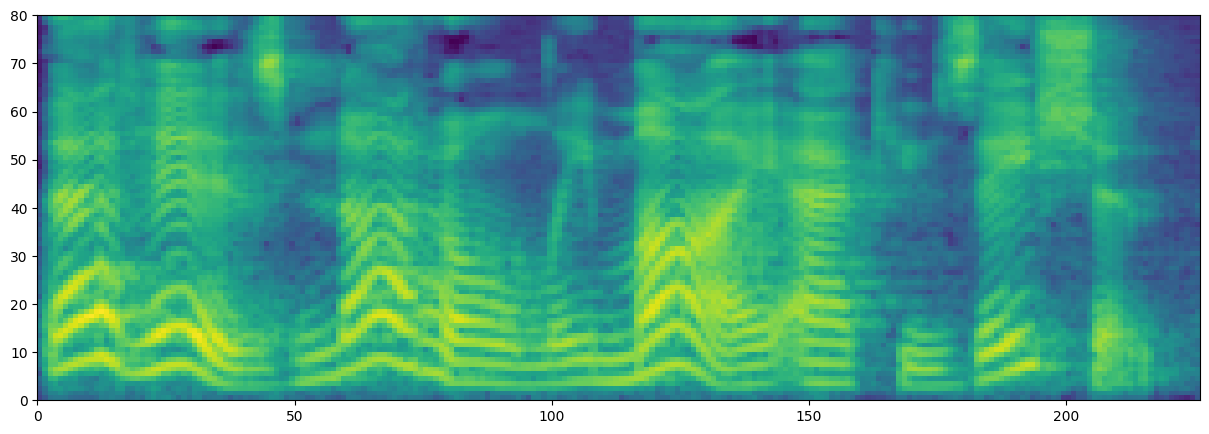

In [45]:
# Plot the spectrogram
plt.figure(figsize=(15,5))
_ = plt.pcolormesh(spec[0].cpu().numpy(), cmap='viridis')

In [56]:
try:
    from nemo_text_processing.text_normalization.normalize import Normalizer
except ModuleNotFoundError:
    raise ModuleNotFoundError(
        "The package `nemo_text_processing` was not installed in this environment. Please refer to"
        " https://github.com/NVIDIA/NeMo-text-processing and install this package before using "
        "this script"
    )

text_normalizer = Normalizer(input_case="cased", lang="en")

ModuleNotFoundError: The package `nemo_text_processing` was not installed in this environment. Please refer to https://github.com/NVIDIA/NeMo-text-processing and install this package before using this script

In [46]:
# First, a standard English normalization of the text.
# We set punct_post_process=True to preserve words with apostrophes, otherwise they get split.
text_normalized = aligner.normalizer.normalize(text_raw, punct_post_process=True)
print(text_normalized)

AttributeError: 'NoneType' object has no attribute 'normalize'

In [55]:
aligner.tokenizer.g2p(text_raw)

['t',
 'h',
 'a',
 't',
 ' ',
 'i',
 's',
 ' ',
 'N',
 'AA1',
 'T',
 ' ',
 'OW1',
 'N',
 'L',
 'IY0',
 ' ',
 'M',
 'AY1',
 ' ',
 'a',
 'c',
 'c',
 'u',
 's',
 'a',
 't',
 'i',
 'o',
 'n',
 '.']